<a href="https://colab.research.google.com/github/julianbustosmt/InmersionDatos_Alura/blob/main/InmersionDatos_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports y Dataset**

In [1]:
import pandas as pd
# Importamos un paquete que permite acceder a Google Drive desde Colab.
from google.colab import drive
drive.mount('/content/drive')

# Asignamos a una variable el data set almacenado en el enlace 
inmuebles = pd.read_csv('/content/drive/MyDrive/Programacion/Alura/inmersion_datos/inmuebles_bogota.csv')


Mounted at /content/drive


In [3]:
# Estandarización del DataFrame
columnas = {'Baños': 'Banos', 'Área': 'Area'}
inmuebles = inmuebles.rename(columns = columnas)

## **Aula 2 - TRATAMIENTO DE DATOS Y PRIMEROS GRÁFICOS**

In [5]:
''' '.info()' nos muestra informacion de nuestro DataFrame, por ahora nos centramos en la columna DType 
que nos muestra el tipo de dato al que pertenece cada columna '''
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [6]:
# Notamos que la columna 'Valor' es de tipo object lo que significa que es un String o Cadena de caracteres
inmuebles.Valor[0]

'$ 360.000.000'

In [ ]:
type(inmuebles.Valor[0])

str

In [7]:
''' Sumamos el 'Valor' de diferentes filas y notamos que aunque sean visualmente numeros al ser de 
tipo object se concatenan.''' 
inmuebles.Valor[0] + inmuebles.Valor[1] + inmuebles.Valor[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [8]:
''' .split() es un método que se utiliza para dividir una cadena de texto en una lista de subcadenas
 (substrings) basándose en un carácter delimitador específico.''' 
 # Realzamos este proceso para dividir el signo peso ($) del valor monetario.
inmuebles.Valor[0].split()

['$', '360.000.000']

In [9]:
# A la variable 'valor' le asignamos un DataFrame con 2 columnas, las cuales se obtienen de dividir con 'split()' los datos en la columa 'Valor' como lo hicimos anteriormente.
valor = inmuebles.Valor.str.split(expand = True)

''' Creamos 2 nuevas columnas en nuestro DataFrame inmuebles. A una le asignamos el signo peso ($)
 (columna 0 del DataFrame 'valor') y a la otra el valor numerico (columna 1 del DataFrame 'valor'). '''
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
8571,Apartamento,Apartamento en venta en Tintala,2,1,45,Tintala,Tintala,$ 185.000.000,$,185.000.000
8650,Apartamento,Apartamento en venta en Chapinero Central,2,2,68,Chapinero Central,Localidad Chapinero resto,$ 463.000.000,$,463.000.000
8044,Casa,Casa en venta en Suba,2,2,67,Suba,Suba,$ 225.000.000,$,225.000.000


In [10]:
# Como observamos en la info la columna 'Precio' aun sigue siendo de tipo object (str)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [11]:
''' Utilizamos el metodo 'replace()' para remplazar un caracter especifico de un dato en este caso el 
punto(.) en nuestra columna 'Precio' por una cadena vacia ('')''' 
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex = True)

# Utilizamso el metodo 'astype()' para cambiar el tipo de dato de la columna 'precio' (object -> float)
# Dividimos por un millo para simplificar los ceros y facilitar la lectura de los datos. 
inmuebles['Precio_millon'] = inmuebles.Precio.astype('float')/1000000


In [12]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [13]:
''' Función que se utiliza para establecer la precisión (número de decimales) que se muestra en la 
salida del DataFrame.''' 
pd.set_option('display.precision', 2)
''' Establecemos un formato específico para los valores de punto flotante (float) que se muestran en la
 salida del DataFrame.''' 
pd.set_option('display.float_format', lambda x : '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [14]:
# Devido a que se notaron algunos valores anomalos en el DataFrame , se uso la funcion 'loc()' para localizarlos y analizarlos. Se determino que corresponden a un error en la digitación. 
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [15]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

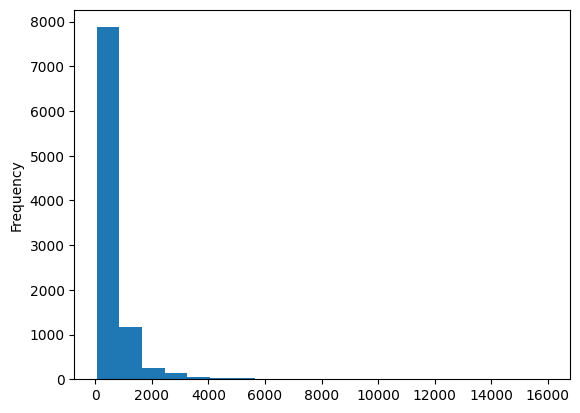

In [16]:
inmuebles['Precio_millon'].plot.hist(bins = 20)

## **Matplotlib y Seaborn**
  Bibliotecas de visualización de datos 

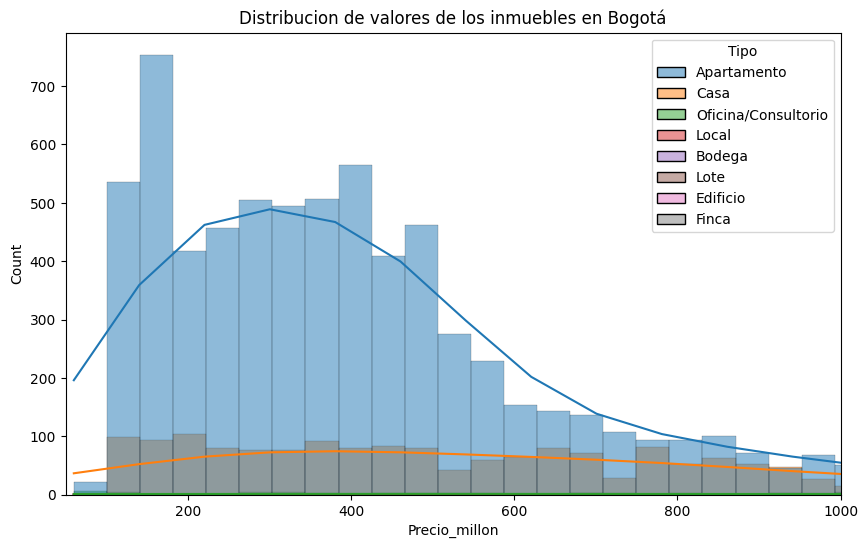

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el tamaño del lienzo en que se mostraran los graficos.
plt.figure(figsize = (10,6))
''' 
- Creamos un histograma de la columna 'Precio_millon' del DataFrame 'inmuebles' y lo almacenamos en la varibale grafica. 
- 'kde = True' especifica que también se debe incluir una estimación de densidad de kernel en el gráfico. 
- El parámetro hue = 'Tipo' se utiliza para agregar diferentes colores al histograma para cada tipo de inmueble.
'''
grafica = sns.histplot(data = inmuebles, x = 'Precio_millon', kde = True, hue = 'Tipo')

# Definimos el titulo de la grafica. 
grafica.set_title('Distribucion de valores de los inmuebles en Bogotá')

# Se definen los rangos maximos y minimos en el eje (x,y)
plt.xlim((50,1000))
#plt.ylim((0,20))

# Guardamos el grafico en formato png (Se puede usar cualquiera) en la direccion especificada. 
plt.savefig('/content/drive/MyDrive/Programacion/Alura/inmersion_datos/valor_inmuebles.png', format = 'png')

plt.show()

## **Desafios Aula 2:**
- 1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información).


<ipython-input-59-5fb3c72ad918>:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  grafica = sns.histplot(data = datos_filtrados, x = 'Precio_millon', kde = True, hue = 'Tipo', multiple="dodge", palette=palette)


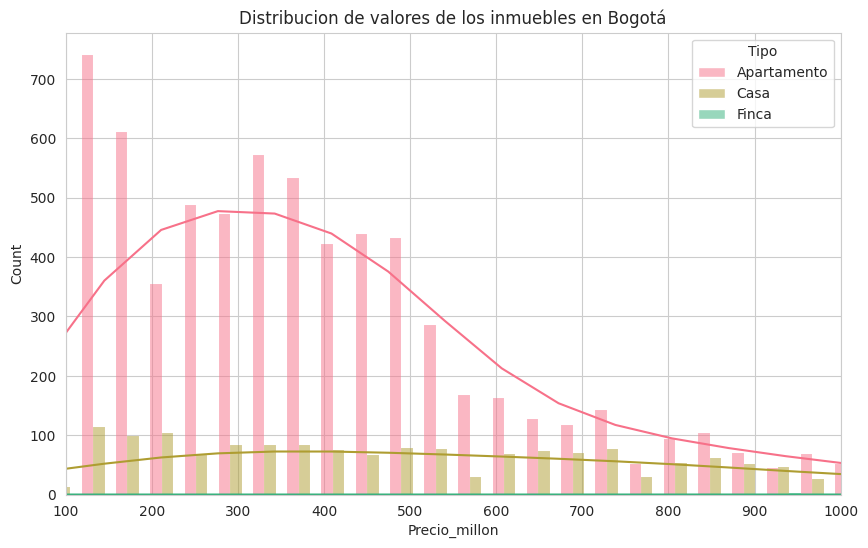

In [59]:
plt.figure(figsize = (10,6))
palette = sns.color_palette("husl", 5)

# Filtramos los datos por tipo
datos_filtrados = inmuebles[(inmuebles.Tipo == 'Casa') | (inmuebles.Tipo == 'Apartamento') | (inmuebles.Tipo == 'Finca')]
grafica = sns.histplot(data = datos_filtrados, x = 'Precio_millon', kde = True, hue = 'Tipo', multiple="dodge", palette=palette)
grafica.set_xlim(100,1000)
grafica.set_title("Distribucion de valores de los inmuebles en Bogotá")



plt.show()

**Conclusiones:** Se puede observar el rango de precios más común para los inmuebles en venta es de 100 a 500 millones de pesos, siendo en su mayoria Apartamentos.

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [ ]:
# Creamos una nueva columna y le asignamos el valor de la operacion (precio / area) para saber cuanto dinero vale cada metro cuadrado de un inmueble.
inmuebles['Precio_m2_Millon'] = inmuebles.Precio_millon / inmuebles.Area
inmuebles.groupby('Barrio')['Precio_m2_Millon'].mean()
#inmuebles.head(3)

Barrio
Alameda              5.98
Alhambra             4.33
Andes Norte          6.05
Antonio Nariño       3.53
Barrancas            4.42
                     ... 
Villa Maria          2.04
Villas De Granada    3.17
Villemar             3.99
Zona Franca          2.96
Zona Noroccidental   4.62
Name: Precio_m2_Millon, Length: 149, dtype: float64

In [ ]:
# Creamos un nuevo DataFrame que contiene la suma de los valores de todas las columnas para cada Barrio.
datos_barrio = inmuebles.groupby('Barrio').sum()
# Calculamos el precio por millon diviendo la sumatoria de los precios , con la sumatoria de las areas. 
datos_barrio['Precio_m2_Barrio'] = datos_barrio.Precio_millon / datos_barrio.Area
datos_barrio
'''Nota: Los valores calculados anteriormente son distintos a los que muestra el nuevo DataFrame por lo
 tanto el metodo que usemos para calcular valores debe ser seleccionado cuidadosamente.'''

,Habitaciones,Banos,Area,Precio_millon,Precio_m2_Millon,Precio_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [ ]:
'''
Asignar el valor del precio por metro cuadrado correspondiente a cada barrio a cada 
registro en el DataFrame inmuebles.
'''
m2_barrio = dict(datos_barrio['Precio_m2_Barrio'])
inmuebles['Precio_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Precio_m2_Barrio'] = inmuebles['Precio_m2_Barrio'].map(m2_barrio)

In [ ]:
'''
Creando una lista llamada top_barrios que contiene los nombres de los 10 barrios con más registros 
en el DataFrame
'''
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [ ]:
# Ya que el DataFrame que creamos anteriormente 'datos_barrio' tenia como indice el nombre del barrio es necesario resetearlo para que su indice sea una numeracion.
datos_barrio.reset_index(inplace = True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_millon,Precio_m2_Millon,Precio_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [ ]:
# Filtramos para incluir solamente los registor en la lista 'top_barrios'
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_millon,Precio_m2_Millon,Precio_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


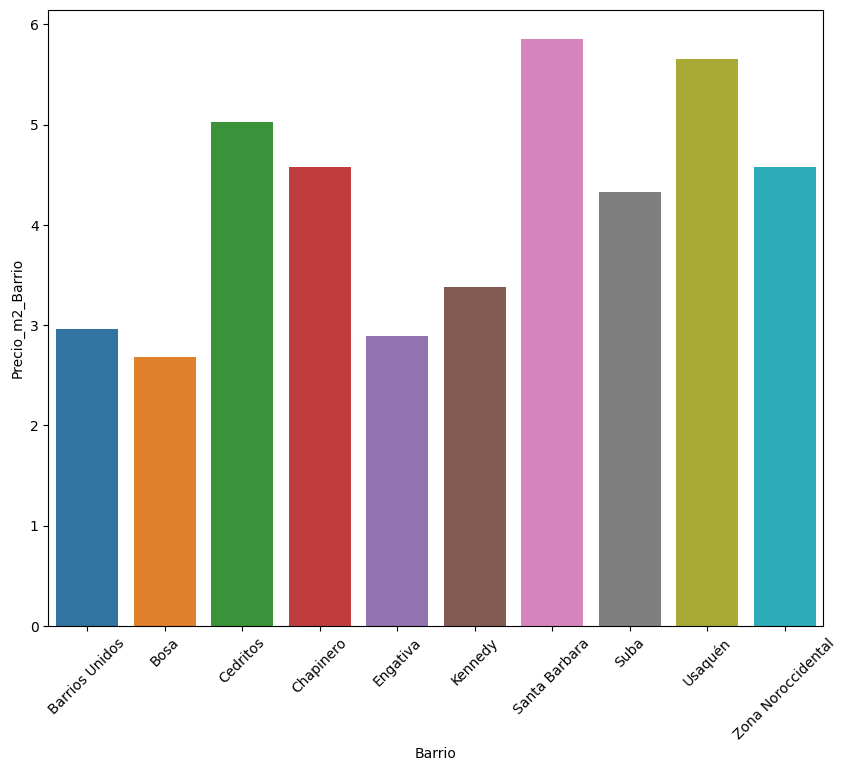

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'Barrio', y = 'Precio_m2_Barrio', data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis = 'x', rotation = 45)

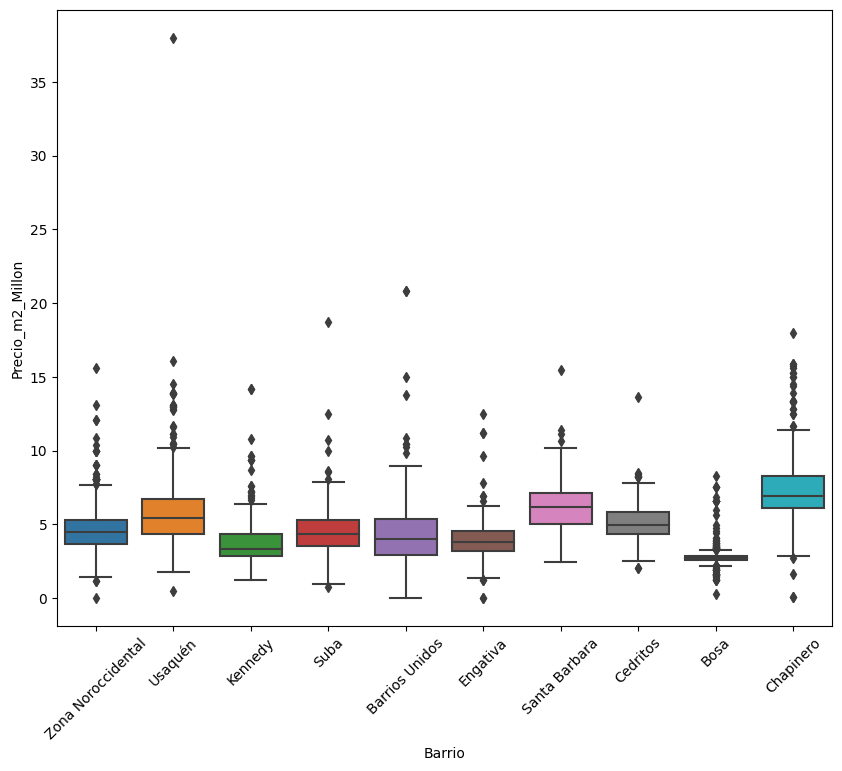

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Barrio', y = 'Precio_m2_Millon', data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

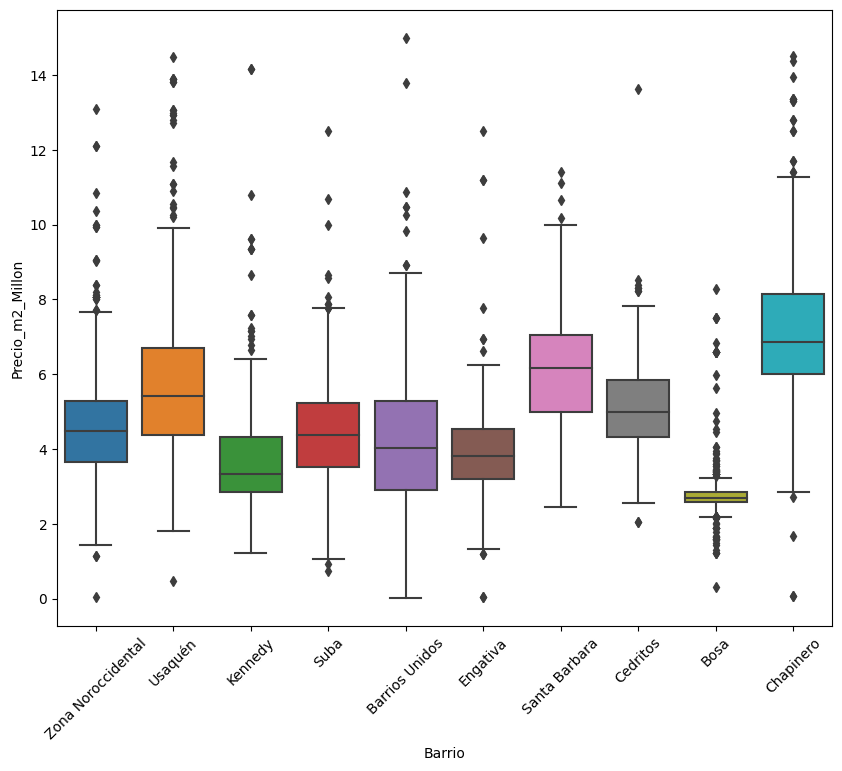

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Barrio', y = 'Precio_m2_Millon', data = inmuebles.query('Barrio in @top_barrios & Precio_m2_Millon < 15'))
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

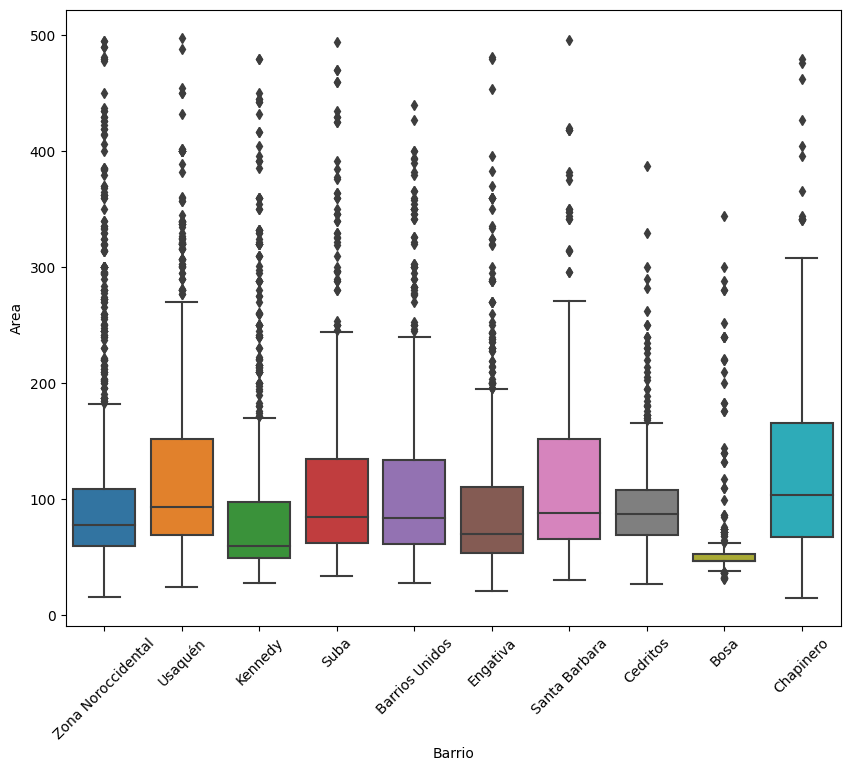

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Barrio', y = 'Area', data = inmuebles.query('Barrio in @top_barrios & Area < 500'))
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

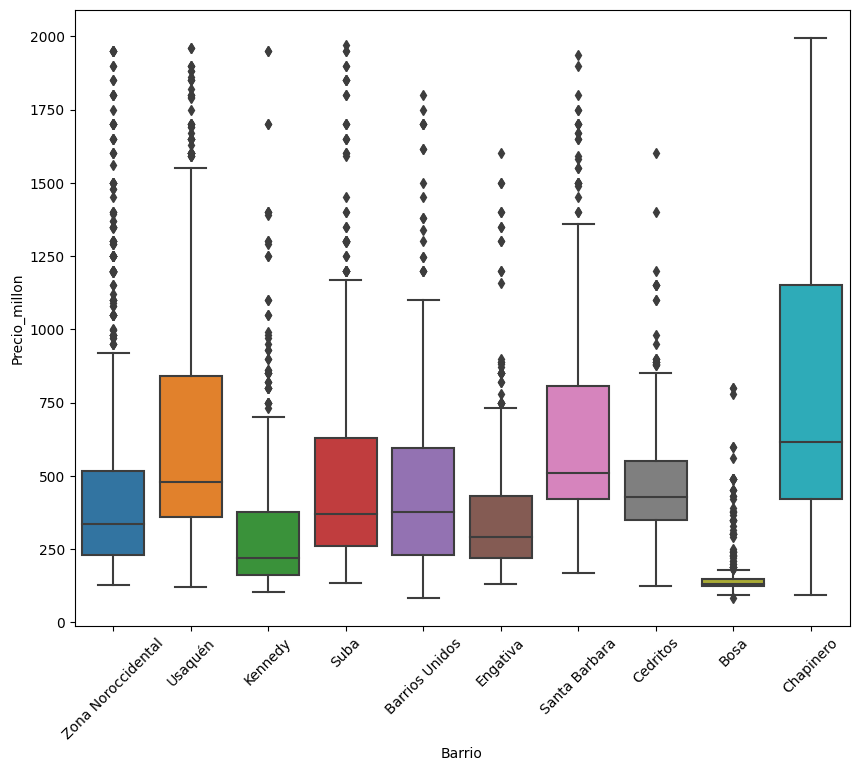

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Barrio', y = 'Precio_millon', data = inmuebles.query('Barrio in @top_barrios & Precio_millon < 2000'))
ax.tick_params(axis = 'x', rotation = 45)
plt.show()